<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_linear_regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with ANN with single neuron
https://www.tensorflow.org/tutorials/keras/regression#linear_regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
dataset_x = np.linspace(-1, 1, 101)
print(f'dataset_x.shape = {dataset_x.shape}')

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
dataset_y = ((2 * dataset_x) - 3) + np.random.randn(*dataset_x.shape) * 0.33

dataset_x.shape = (101,)


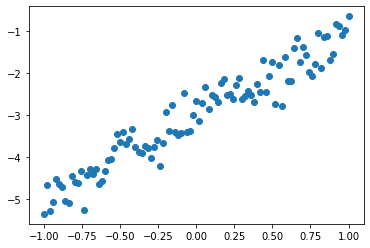

In [12]:
plt.scatter(dataset_x, dataset_y)
plt.show()

In [13]:
dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, -5.355791452287806), (-0.98, -4.664866768049076), (-0.96, -5.287908368509555), (-0.94, -5.073323756042514), (-0.92, -4.51781008133061), (-0.9, -4.650289854453361), (-0.88, -4.7124275767938), (-0.86, -5.0515547707254), (-0.84, -5.10675102965544), (-0.8200000000000001, -4.448481340218139), (-0.8, -4.601337567367947), (-0.78, -4.628030104691891), (-0.76, -4.33245611913537), (-0.74, -5.27256751860841), (-0.72, -4.43553980717957), (-0.7, -4.286543248964516), (-0.6799999999999999, -4.410756467559624), (-0.6599999999999999, -4.296945734219949), (-0.64, -4.645045801685945), (-0.62, -4.583622481165174), (-0.6, -4.3363766957491405), (-0.5800000000000001, -4.0636154849829405), (-0.56, -4.044978342440516), (-0.54, -3.7794591135909252), (-0.52, -3.4606730999593616), (-0.5, -3.63969720228826), (-0.48, -3.4168377163523007), (-0.45999999999999996, -3.6888332241961126), (-0.43999999999999995, -3.579029412819361), (-0.42000000000000004, -3.332459750840105), (-0.4, -3.7606771398552428),

In [14]:
train_features = dataset_train.copy()
test_features = dataset_test.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

x = np.array(train_features['x'])

In [17]:
def plot_fn(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

In [18]:
x = np.linspace(-1, 1, 101)

1.971781195332424 -3.017234772803697


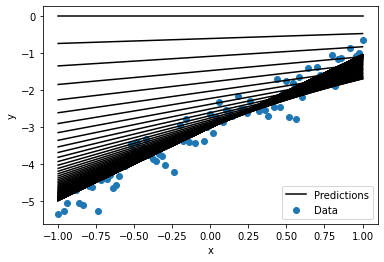

In [20]:
learning_rate = 0.1
epochs = 100

k = 0
b = 0

y = k*x + b
plot_fn(x,y)

n = dataset_x.shape[0]

# Gradient Descent iterations
for i in range(epochs): 
    Y_pred = k*dataset_x + b  # The current predicted value of Y
    D_k = (-2/n) * sum(dataset_x * (dataset_y - Y_pred))  # Derivative wrt k
    D_b = (-2/n) * sum(dataset_y - Y_pred)  # Derivative wrt b
    k = k - learning_rate * D_k  # Update k
    b = b - learning_rate * D_b  # Update b

    if epochs % 10 == 0:
      y = k*x + b
      plt.plot(x, y, color='k', label='Predictions')
    
print (k, b)



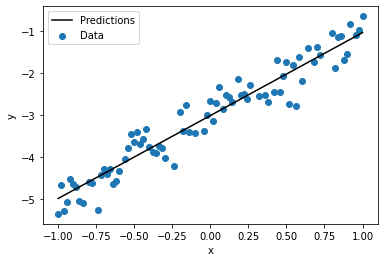

In [21]:
y = k*x + b
plot_fn(x,y)